In [1]:
import numpy  as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
import itertools

In [2]:
data =pd.read_csv('data-Hamburgstation.csv')
data.head()



,date,id,stid,e5,e10,diesel,changed
0,5/1/2016 21:26,1691,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,999,63
1,5/1/2016 23:05,22492,51d4b4ff-a095-1aa0-e100-80009459e03a,1319,1299,1069,21
2,5/2/2016 6:17,33677,51d4b4ff-a095-1aa0-e100-80009459e03a,1299,1279,1049,21
3,5/2/2016 9:57,60370,51d4b4ff-a095-1aa0-e100-80009459e03a,1279,1259,1019,21
4,5/2/2016 11:45,71060,51d4b4ff-a095-1aa0-e100-80009459e03a,1269,1249,1009,21


In [3]:
print(data.dtypes)


date       object
id          int64
stid       object
e5          int64
e10         int64
diesel      int64
changed     int64
dtype: object


In [4]:
print(data.columns)

Index(['date', 'id', 'stid', 'e5', 'e10', 'diesel', 'changed'], dtype='object')


In [5]:
from datetime import datetime
con=data['date']
data['date']=pd.to_datetime(data['date'])
data.set_index('date',inplace=True)
data.index

DatetimeIndex(['2016-05-01 21:26:00', '2016-05-01 23:05:00',
               '2016-05-02 06:17:00', '2016-05-02 09:57:00',
               '2016-05-02 11:45:00', '2016-05-02 12:37:00',
               '2016-05-02 14:17:00', '2016-05-02 15:45:00',
               '2016-05-02 17:45:00', '2016-05-02 23:03:00',
               ...
               '2018-10-10 07:24:00', '2018-10-10 08:23:00',
               '2018-10-10 09:23:00', '2018-10-10 10:23:00',
               '2018-10-10 11:25:00', '2018-10-10 12:47:00',
               '2018-10-10 13:53:00', '2018-10-10 17:10:00',
               '2018-10-10 18:08:00', '2018-10-10 18:56:00'],
              dtype='datetime64[ns]', name='date', length=12136, freq=None)

In [6]:
print(data.columns)

Index(['id', 'stid', 'e5', 'e10', 'diesel', 'changed'], dtype='object')


In [7]:
data.head(100)

,id,stid,e5,e10,diesel,changed
date,,,,,,
2016-05-01 21:26:00,1691,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,999,63
2016-05-01 23:05:00,22492,51d4b4ff-a095-1aa0-e100-80009459e03a,1319,1299,1069,21
2016-05-02 06:17:00,33677,51d4b4ff-a095-1aa0-e100-80009459e03a,1299,1279,1049,21
2016-05-02 09:57:00,60370,51d4b4ff-a095-1aa0-e100-80009459e03a,1279,1259,1019,21
2016-05-02 11:45:00,71060,51d4b4ff-a095-1aa0-e100-80009459e03a,1269,1249,1009,21
2016-05-02 12:37:00,83216,51d4b4ff-a095-1aa0-e100-80009459e03a,1289,1269,1029,21
2016-05-02 14:17:00,99575,51d4b4ff-a095-1aa0-e100-80009459e03a,1269,1249,1009,21
2016-05-02 15:45:00,111744,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,999,21
2016-05-02 17:45:00,122889,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,989,1


In [8]:
data.tail(50)

,id,stid,e5,e10,diesel,changed
date,,,,,,
2018-10-06 17:10:00,138074364,51d4b4ff-a095-1aa0-e100-80009459e03a,1529,1509,1379,21
2018-10-06 18:08:00,138092244,51d4b4ff-a095-1aa0-e100-80009459e03a,1499,1479,1349,21
2018-10-06 18:53:00,138102905,51d4b4ff-a095-1aa0-e100-80009459e03a,1449,1429,1329,21
2018-10-07 06:31:00,138131861,51d4b4ff-a095-1aa0-e100-80009459e03a,1529,1509,1409,21
2018-10-07 07:23:00,138138376,51d4b4ff-a095-1aa0-e100-80009459e03a,1519,1499,1399,21
2018-10-07 08:22:00,138148551,51d4b4ff-a095-1aa0-e100-80009459e03a,1509,1489,1389,21
2018-10-07 09:07:00,138158985,51d4b4ff-a095-1aa0-e100-80009459e03a,1499,1479,1349,21
2018-10-07 09:53:00,138168400,51d4b4ff-a095-1aa0-e100-80009459e03a,1489,1469,1339,21
2018-10-07 11:53:00,138186339,51d4b4ff-a095-1aa0-e100-80009459e03a,1479,1459,1329,21


In [9]:
del data['id']

In [10]:

del data['stid']


In [11]:
del data['e5']


In [12]:
del data['e10']

In [13]:
del data['changed']


In [14]:
data.tail()

,diesel
date,
2018-10-10 12:47:00,1369
2018-10-10 13:53:00,1319
2018-10-10 17:10:00,1359
2018-10-10 18:08:00,1349
2018-10-10 18:56:00,1299


In [15]:
print(data.dtypes)

diesel    int64
dtype: object


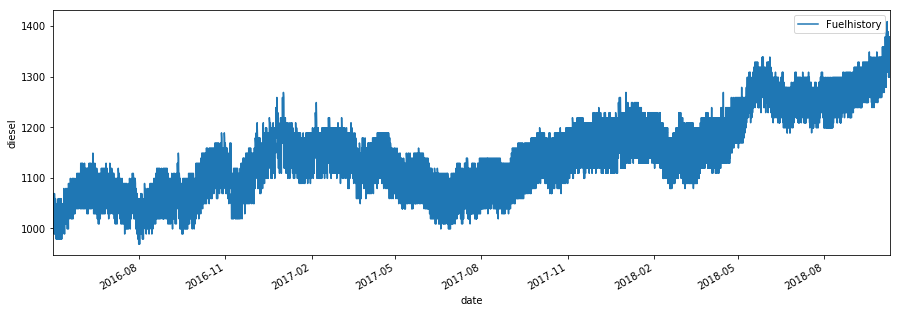

In [16]:
my_plot=data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])

In [17]:
data.isnull()

,diesel
date,
2016-05-01 21:26:00,False
2016-05-01 23:05:00,False
2016-05-02 06:17:00,False
2016-05-02 09:57:00,False
2016-05-02 11:45:00,False
2016-05-02 12:37:00,False
2016-05-02 14:17:00,False
2016-05-02 15:45:00,False
2016-05-02 17:45:00,False


In [18]:
data.describe()

,diesel
count,12136.000000
mean,1136.883158
std,74.752121
min,969.000000
25%,1079.000000
50%,1129.000000
75%,1179.000000
max,1409.000000


In [19]:
data = data[~np.all(data == 0, axis=1)]

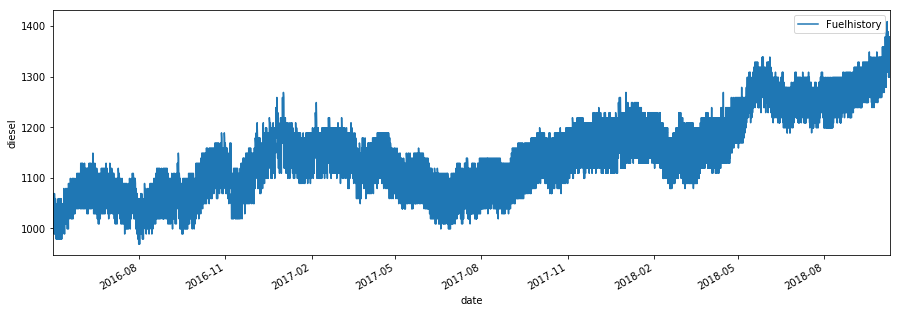

In [20]:
my_plot=data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])

In [21]:
data.isnull()

,diesel
date,
2016-05-01 21:26:00,False
2016-05-01 23:05:00,False
2016-05-02 06:17:00,False
2016-05-02 09:57:00,False
2016-05-02 11:45:00,False
2016-05-02 12:37:00,False
2016-05-02 14:17:00,False
2016-05-02 15:45:00,False
2016-05-02 17:45:00,False


In [22]:
data=data['2016-5-1':'2018-10-10']
print(data.dtypes)

diesel    int64
dtype: object


In [23]:
print(data.index[0],data.index[-1])

2016-05-01 21:26:00 2018-10-10 18:56:00


In [24]:
mid=pd.date_range(data.index[0],data.index[-1],freq="H",normalize=True)
mid

DatetimeIndex(['2016-05-01 00:00:00', '2016-05-01 01:00:00',
               '2016-05-01 02:00:00', '2016-05-01 03:00:00',
               '2016-05-01 04:00:00', '2016-05-01 05:00:00',
               '2016-05-01 06:00:00', '2016-05-01 07:00:00',
               '2016-05-01 08:00:00', '2016-05-01 09:00:00',
               ...
               '2018-10-09 15:00:00', '2018-10-09 16:00:00',
               '2018-10-09 17:00:00', '2018-10-09 18:00:00',
               '2018-10-09 19:00:00', '2018-10-09 20:00:00',
               '2018-10-09 21:00:00', '2018-10-09 22:00:00',
               '2018-10-09 23:00:00', '2018-10-10 00:00:00'],
              dtype='datetime64[ns]', length=21409, freq='H')

In [25]:
new_index=mid.union(data.index)
#print(new_index)

upsampled_data=data.reindex(new_index)
upsampled_data.head(20)


,diesel
2016-05-01 00:00:00,NaN
2016-05-01 01:00:00,NaN
2016-05-01 02:00:00,NaN
2016-05-01 03:00:00,NaN
2016-05-01 04:00:00,NaN
2016-05-01 05:00:00,NaN
2016-05-01 06:00:00,NaN
2016-05-01 07:00:00,NaN
2016-05-01 08:00:00,NaN
2016-05-01 09:00:00,NaN


In [26]:
upsampled_data.isnull()



,diesel
2016-05-01 00:00:00,True
2016-05-01 01:00:00,True
2016-05-01 02:00:00,True
2016-05-01 03:00:00,True
2016-05-01 04:00:00,True
2016-05-01 05:00:00,True
2016-05-01 06:00:00,True
2016-05-01 07:00:00,True
2016-05-01 08:00:00,True
2016-05-01 09:00:00,True


In [27]:
upsampled_data = upsampled_data.iloc[22:]
upsampled_data.head(100)


,diesel
2016-05-01 21:26:00,999.0
2016-05-01 22:00:00,NaN
2016-05-01 23:00:00,NaN
2016-05-01 23:05:00,1069.0
2016-05-02 00:00:00,NaN
2016-05-02 01:00:00,NaN
2016-05-02 02:00:00,NaN
2016-05-02 03:00:00,NaN
2016-05-02 04:00:00,NaN
2016-05-02 05:00:00,NaN


In [28]:
upsampled_data['Hourly']=upsampled_data.isnull()
upsampled_data.head()

,diesel,Hourly
2016-05-01 21:26:00,999.0,False
2016-05-01 22:00:00,NaN,True
2016-05-01 23:00:00,NaN,True
2016-05-01 23:05:00,1069.0,False
2016-05-02 00:00:00,NaN,True


In [29]:

upsampled_data = upsampled_data.fillna(method='ffill')

upsampled_data.head(50)

,diesel,Hourly
2016-05-01 21:26:00,999.0,False
2016-05-01 22:00:00,999.0,True
2016-05-01 23:00:00,999.0,True
2016-05-01 23:05:00,1069.0,False
2016-05-02 00:00:00,1069.0,True
2016-05-02 01:00:00,1069.0,True
2016-05-02 02:00:00,1069.0,True
2016-05-02 03:00:00,1069.0,True
2016-05-02 04:00:00,1069.0,True
2016-05-02 05:00:00,1069.0,True


In [30]:
upsampled_data.drop(upsampled_data[upsampled_data['Hourly'] == False].index, inplace=True)

In [31]:
#upsampled_data=data.reindex(new_index)
df=upsampled_data.astype(int)

df.head(20)

,diesel,Hourly
2016-05-01 22:00:00,999,1
2016-05-01 23:00:00,999,1
2016-05-02 00:00:00,1069,1
2016-05-02 01:00:00,1069,1
2016-05-02 02:00:00,1069,1
2016-05-02 03:00:00,1069,1
2016-05-02 04:00:00,1069,1
2016-05-02 05:00:00,1069,1
2016-05-02 06:00:00,1069,1
2016-05-02 07:00:00,1049,1


In [32]:
del df['Hourly']

In [33]:
df = df.iloc[2:]
df.head(100)

,diesel
2016-05-02 00:00:00,1069
2016-05-02 01:00:00,1069
2016-05-02 02:00:00,1069
2016-05-02 03:00:00,1069
2016-05-02 04:00:00,1069
2016-05-02 05:00:00,1069
2016-05-02 06:00:00,1069
2016-05-02 07:00:00,1049
2016-05-02 08:00:00,1049
2016-05-02 09:00:00,1049


In [34]:
df=df['2016-5-2':'2018-10-9']
df.tail(24)

,diesel
2018-10-09 00:00:00,1299
2018-10-09 01:00:00,1299
2018-10-09 02:00:00,1299
2018-10-09 03:00:00,1299
2018-10-09 04:00:00,1299
2018-10-09 05:00:00,1299
2018-10-09 06:00:00,1299
2018-10-09 07:00:00,1379
2018-10-09 08:00:00,1369
2018-10-09 09:00:00,1359


In [35]:
df.describe()

,diesel
count,21327.000000
mean,1138.382942
std,74.613412
min,969.000000
25%,1089.000000
50%,1129.000000
75%,1189.000000
max,1409.000000


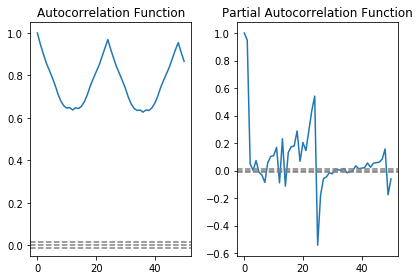

In [36]:
def Plot_ACF_PACF(value):
    lag_acf = acf(value, nlags=50)
    lag_pacf = pacf(value, nlags=50, method='ols')
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value,)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
Plot_ACF_PACF(df.diesel)

In [37]:

Monthly_data=df['2017-9-2':'2017-9-9']
Monthly_data.head(100)

,diesel
2017-09-02 00:00:00,1149
2017-09-02 01:00:00,1149
2017-09-02 02:00:00,1149
2017-09-02 03:00:00,1149
2017-09-02 04:00:00,1149
2017-09-02 05:00:00,1149
2017-09-02 06:00:00,1149
2017-09-02 07:00:00,1139
2017-09-02 08:00:00,1139
2017-09-02 09:00:00,1129


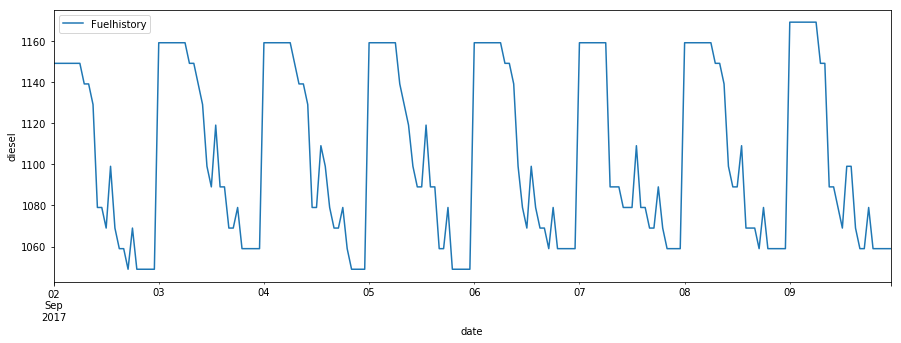

In [38]:
my_plot=Monthly_data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])


In [39]:
df.describe()

,diesel
count,21327.000000
mean,1138.382942
std,74.613412
min,969.000000
25%,1089.000000
50%,1129.000000
75%,1189.000000
max,1409.000000


In [40]:
df.index.name='date'
df.reset_index(inplace=True)
df.head()


,date,diesel
0,2016-05-02 00:00:00,1069
1,2016-05-02 01:00:00,1069
2,2016-05-02 02:00:00,1069
3,2016-05-02 03:00:00,1069
4,2016-05-02 04:00:00,1069


In [41]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.index

DatetimeIndex(['2016-05-02 00:00:00', '2016-05-02 01:00:00',
               '2016-05-02 02:00:00', '2016-05-02 03:00:00',
               '2016-05-02 04:00:00', '2016-05-02 05:00:00',
               '2016-05-02 06:00:00', '2016-05-02 07:00:00',
               '2016-05-02 08:00:00', '2016-05-02 09:00:00',
               ...
               '2018-10-09 14:00:00', '2018-10-09 15:00:00',
               '2018-10-09 16:00:00', '2018-10-09 17:00:00',
               '2018-10-09 18:00:00', '2018-10-09 19:00:00',
               '2018-10-09 20:00:00', '2018-10-09 21:00:00',
               '2018-10-09 22:00:00', '2018-10-09 23:00:00'],
              dtype='datetime64[ns]', name='date', length=21327, freq=None)

In [42]:

#tf=df['diesel']
#tf.tail()

In [43]:
#split = int(len(tf) / 2)
#print(split)
#X1=X[0:split]
#X2 =X[split:]
#mean1, mean2 = X1.mean(), X2.mean()
#var1, var2 = X1.var(), X2.var()
#print('mean1=%f, mean2=%f' % (mean1, mean2))
#print('variance1=%f, variance2=%f' % (var1, var2))
percent_training=0.9
split_point=round(len(df)*percent_training)
training,testing=df[0:split_point],df[split_point:]
#training=df['2016-5-2':'2018-9-9']
#testing=df['2018-9-10':'2018-10-9']

In [44]:
training.describe()

,diesel
count,19194.000000
mean,1125.223820
std,65.484699
min,969.000000
25%,1079.000000
50%,1119.000000
75%,1169.000000
max,1339.000000


In [45]:
testing.describe()

,diesel
count,2133.000000
mean,1256.796531
std,38.674349
min,1189.000000
25%,1219.000000
50%,1259.000000
75%,1279.000000
max,1409.000000


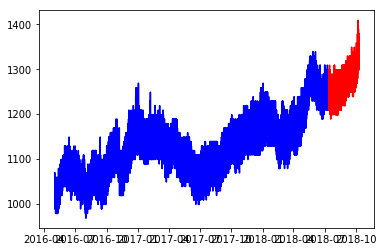

In [46]:
plt.plot(training,'b')
plt.plot(testing,'r')


In [47]:
training=training['diesel']
training.tail()

date
2018-07-12 21:00:00    1209
2018-07-12 22:00:00    1209
2018-07-12 23:00:00    1209
2018-07-13 00:00:00    1209
2018-07-13 01:00:00    1209
Name: diesel, dtype: int32

In [48]:

#Checking the stationery of time series


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
  

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # Remove the CWD from sys.path while we load stuff.


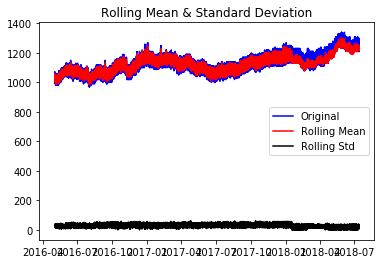

Results of Dickey-Fuller Test:
Test Statistic                    -2.025954
p-value                            0.275310
#Lags Used                        45.000000
Number of Observations Used    19148.000000
Critical Value (1%)               -3.430692
Critical Value (5%)               -2.861691
Critical Value (10%)              -2.566850
dtype: float64


In [49]:
  test_stationarity(training)

In [50]:
#from numpy import log
#X=log(tf)
#split = int(len(X) / 2)
#X1=X[0:split]
#X2 =X[split:]
#mean1, mean2 = X1.mean(), X2.mean()
#var1, var2 = X1.var(), X2.var()
#print('mean1=%f, mean2=%f' % (mean1, mean2))
#print('variance1=%f, variance2=%f' % (var1, var2))

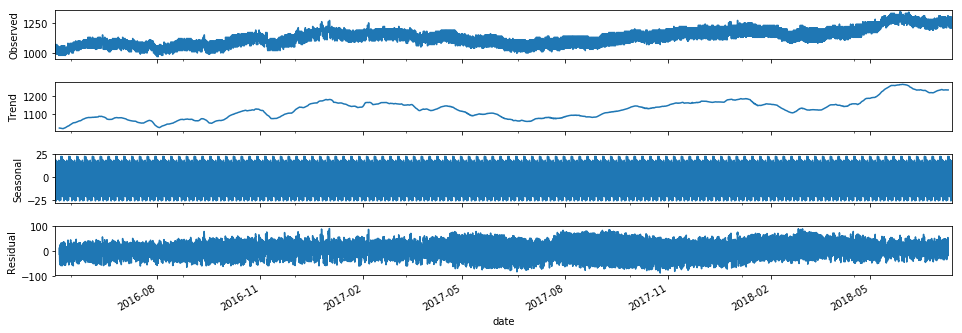

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(training,model="additive",filt=None, freq=168)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig = decomposition.plot()
fig.set_size_inches(15, 5)

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # Remove the CWD from sys.path while we load stuff.


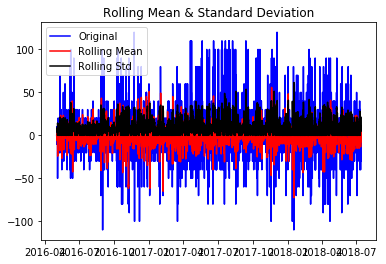

Results of Dickey-Fuller Test:
Test Statistic                   -23.506518
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    19124.000000
Critical Value (1%)               -3.430692
Critical Value (5%)               -2.861691
Critical Value (10%)              -2.566850
dtype: float64


In [52]:
training_Seasonal_difference=training-training.shift(24)
test_stationarity(training_Seasonal_difference.dropna(inplace=False))

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # Remove the CWD from sys.path while we load stuff.


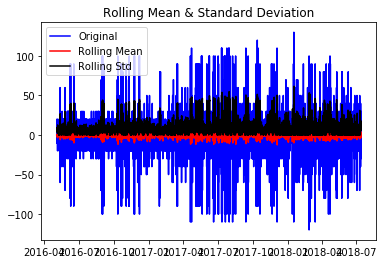

Results of Dickey-Fuller Test:
Test Statistic                   -36.032589
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    19129.000000
Critical Value (1%)               -3.430692
Critical Value (5%)               -2.861691
Critical Value (10%)              -2.566850
dtype: float64


In [53]:
training_Seasonal_First_difference=training_Seasonal_difference - training_Seasonal_difference.shift(1)
test_stationarity(training_Seasonal_First_difference.dropna(inplace=False))

In [54]:
training_Seasonal_First_difference.dropna(inplace=True)
residual.dropna(inplace=True)

Text(0.5,0,'date')

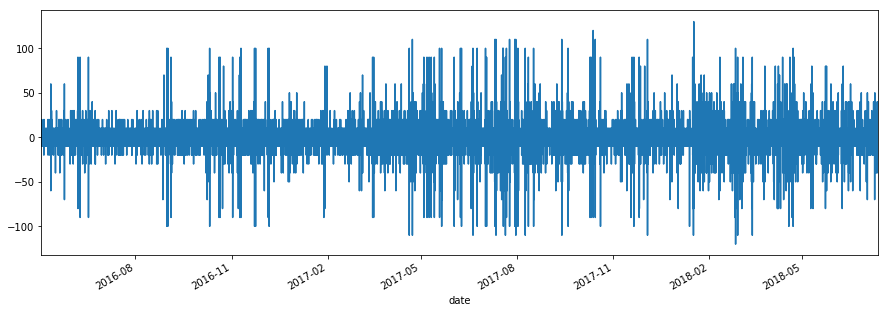

In [55]:
#tf_log_diff=tf_log_diff.iloc[1:]
training_Seasonal_difference.dropna(inplace=True)
my_plot=training_Seasonal_First_difference.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
#plt.plot(tf_log_diff)

In [56]:
#test_stationarity(tf_log_diff)

In [57]:

#tf_decompose=residual
#tf_decompose.dropna(inplace=True)
#test_stationarity(tf_decompose)

In [58]:
#tf.head()

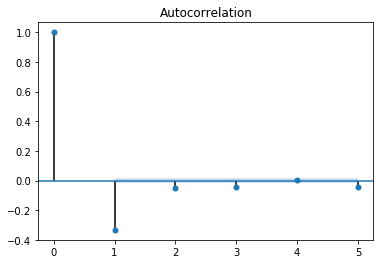

In [59]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(training_Seasonal_First_difference,lags=5)
#plot_acf(residual,lags=50)
pyplot.show()

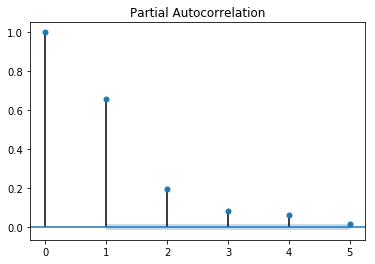

In [60]:
plot_pacf(training_Seasonal_difference,lags=5)
pyplot.show()

In [61]:
#tf.head()
#tf_log_diff.head()

In [62]:

#model = ARIMA(tf_log,order=(1,1,1))  
#results_ARIMA = model.fit(disp=-1)  
#plt.plot(tf_log_diff)
#plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-tf_log_diff)**2))


ARIMA sumarry and residual plots

In [63]:
# Define the p, d and q parameters to take any value between 0 and 2
p =range(0,3)
d =range(0,2)
q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 0, 2, 24)
SARIMAX: (0, 0, 2) x (0, 1, 0, 24)
SARIMAX: (0, 0, 2) x (0, 1, 1, 24)


c4=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(training,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
            c4.append('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            c4.append(results.aic)
        except:
            continue

In [118]:
model =sm.tsa.statespace.SARIMAX(training.values,order=(2, 1, 5),
                                seasonal_order=(1, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibilit=False)

model_fit = model.fit(disp=0)

print(model_fit.summary())


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                19194
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 24)   Log Likelihood              -75055.392
Date:                            Sun, 13 Jan 2019   AIC                         150120.784
Time:                                    21:59:02   BIC                         150160.076
Sample:                                         0   HQIC                        150133.667
                                          - 19194                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3890      0.003   -125.872      0.000      -0.395      -0.383
ar.L2         -0.1879      0.004   

model =sm.tsa.statespace.SARIMAX(training.values,order=(5, 1, 5),
                                seasonal_order=(1, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibilit=False)

model_fit = model.fit(disp=0)

print(model_fit.summary())


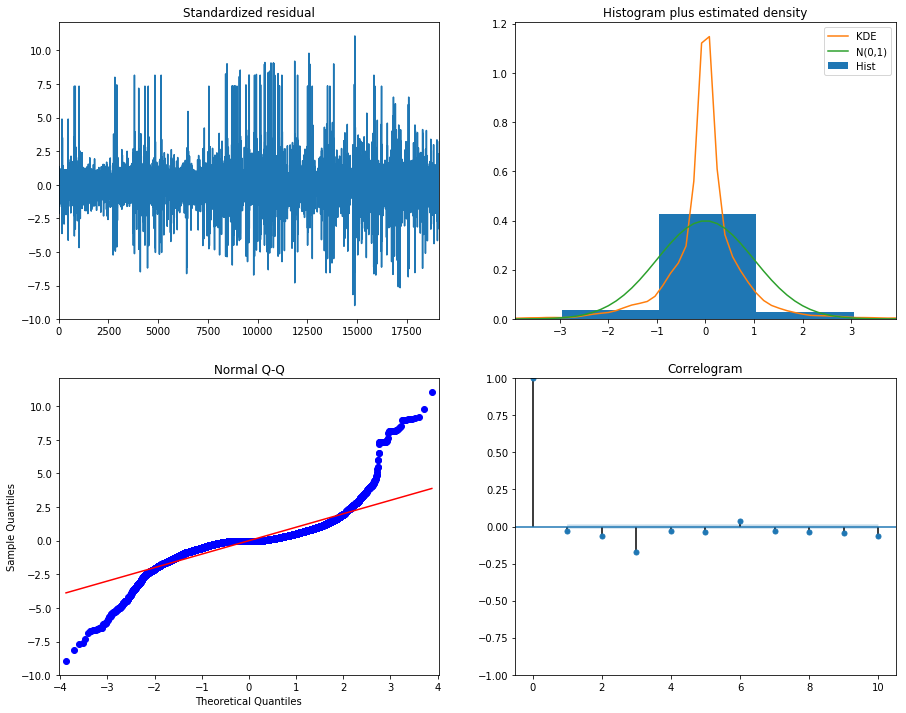

In [119]:
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
testing.head()

In [ ]:
#testing['forecast']=model_fit.predict(start =28341, end = 29832, dynamic=False)

#plt.plot(df,'b')
#plt.plot(testing['forecast'],'r');
#testing[['diesel', 'forecast']].plot(figsize=(12, 8))


In [ ]:
testing.describe()

date
2018-07-13 02:00:00    1210.157702
2018-07-13 03:00:00    1209.707347
2018-07-13 04:00:00    1209.664988
2018-07-13 05:00:00    1209.766095
2018-07-13 06:00:00    1203.573971
2018-07-13 07:00:00    1291.935790
2018-07-13 08:00:00    1291.944329
2018-07-13 09:00:00    1289.734422
2018-07-13 10:00:00    1241.941475
2018-07-13 11:00:00    1238.102926
2018-07-13 12:00:00    1223.573440
2018-07-13 13:00:00    1263.573355
2018-07-13 14:00:00    1225.091154
2018-07-13 15:00:00    1211.942019
2018-07-13 16:00:00    1209.734149
2018-07-13 17:00:00    1201.942015
2018-07-13 18:00:00    1241.942015
2018-07-13 19:00:00    1208.467556
2018-07-13 20:00:00    1208.467556
2018-07-13 21:00:00    1208.467556
2018-07-13 22:00:00    1201.942015
2018-07-13 23:00:00    1201.942015
2018-07-14 00:00:00    1204.149877
2018-07-14 01:00:00    1204.149877
2018-07-14 02:00:00    1204.863109
2018-07-14 03:00:00    1204.585657
2018-07-14 04:00:00    1204.559560
2018-07-14 05:00:00    1204.621849
2018-07-14 06:0

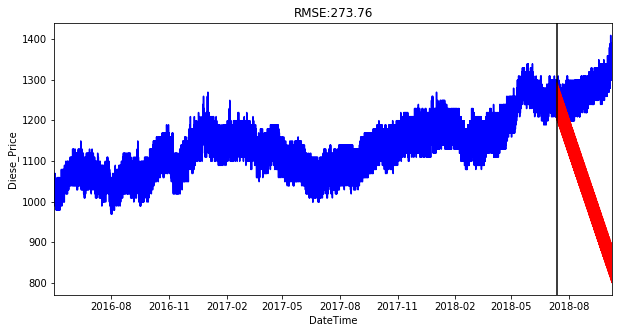

In [120]:
K=len(testing)
testing['forecast']=model_fit.forecast(K)
#forecast=forecast.astype(int)
#forecast=np.exp(forecast)
print(testing['forecast'])
#plot forecast results and display RMSE
plt.figure(figsize=(10,5))
plt.plot(df,'b');
plt.plot(testing['forecast'],'r');

plt.title('RMSE:%.2f'% np.sqrt(sum((testing['diesel']-testing['forecast'])**2)/len(testing)));
plt.xlabel("DateTime");
plt.ylabel("Diese_Price");
plt.autoscale(enable=True,axis='x',tight=True)
plt.axvline(x=df.index[split_point],color='black');#line separates training/testing

Scaling back Predictions

In [108]:
mid=pd.date_range('2018-10-10 00:00:00',periods=1000,freq="H",normalize=True)
future = pd.DataFrame(index=mid, columns= df.columns)
df = pd.concat([df, future])
print(df)

                    diesel
2016-05-02 00:00:00   1069
2016-05-02 01:00:00   1069
2016-05-02 02:00:00   1069
2016-05-02 03:00:00   1069
2016-05-02 04:00:00   1069
2016-05-02 05:00:00   1069
2016-05-02 06:00:00   1069
2016-05-02 07:00:00   1049
2016-05-02 08:00:00   1049
2016-05-02 09:00:00   1049
2016-05-02 10:00:00   1019
2016-05-02 11:00:00   1019
2016-05-02 12:00:00   1009
2016-05-02 13:00:00   1029
2016-05-02 14:00:00   1029
2016-05-02 15:00:00   1009
2016-05-02 16:00:00    999
2016-05-02 17:00:00    999
2016-05-02 18:00:00    989
2016-05-02 19:00:00    989
2016-05-02 20:00:00    989
2016-05-02 21:00:00    989
2016-05-02 22:00:00    989
2016-05-02 23:00:00    989
2016-05-03 00:00:00   1069
2016-05-03 01:00:00   1069
2016-05-03 02:00:00   1069
2016-05-03 03:00:00   1069
2016-05-03 04:00:00   1069
2016-05-03 05:00:00   1069
...                    ...
2018-11-19 10:00:00    NaN
2018-11-19 11:00:00    NaN
2018-11-19 12:00:00    NaN
2018-11-19 13:00:00    NaN
2018-11-19 14:00:00    NaN
2

In [109]:
df.fillna(0)

,diesel
2016-05-02 00:00:00,1069
2016-05-02 01:00:00,1069
2016-05-02 02:00:00,1069
2016-05-02 03:00:00,1069
2016-05-02 04:00:00,1069
2016-05-02 05:00:00,1069
2016-05-02 06:00:00,1069
2016-05-02 07:00:00,1049
2016-05-02 08:00:00,1049
2016-05-02 09:00:00,1049


In [110]:
Step=df['2018-10-12':'2018-11-20']
Step=Step.fillna(0)
print(Step)

                     diesel
2018-10-12 00:00:00       0
2018-10-12 01:00:00       0
2018-10-12 00:00:00       0
2018-10-12 01:00:00       0
2018-10-12 02:00:00       0
2018-10-12 03:00:00       0
2018-10-12 04:00:00       0
2018-10-12 05:00:00       0
2018-10-12 06:00:00       0
2018-10-12 07:00:00       0
2018-10-12 08:00:00       0
2018-10-12 09:00:00       0
2018-10-12 10:00:00       0
2018-10-12 11:00:00       0
2018-10-12 12:00:00       0
2018-10-12 13:00:00       0
2018-10-12 14:00:00       0
2018-10-12 15:00:00       0
2018-10-12 16:00:00       0
2018-10-12 17:00:00       0
2018-10-12 18:00:00       0
2018-10-12 19:00:00       0
2018-10-12 20:00:00       0
2018-10-12 21:00:00       0
2018-10-12 22:00:00       0
2018-10-12 23:00:00       0
2018-10-13 00:00:00       0
2018-10-13 01:00:00       0
2018-10-13 02:00:00       0
2018-10-13 03:00:00       0
...                     ...
2018-11-19 10:00:00       0
2018-11-19 11:00:00       0
2018-11-19 12:00:00       0
2018-11-19 13:00:00 

2018-10-12 00:00:00    1211.675261
2018-10-12 01:00:00    1212.587042
2018-10-12 00:00:00    1213.515631
2018-10-12 01:00:00    1213.799962
2018-10-12 02:00:00    1208.582239
2018-10-12 03:00:00    1296.493570
2018-10-12 04:00:00    1295.877257
2018-10-12 05:00:00    1294.252982
2018-10-12 06:00:00    1247.283547
2018-10-12 07:00:00    1242.803336
2018-10-12 08:00:00    1229.679343
2018-10-12 09:00:00    1269.550174
2018-10-12 10:00:00    1230.841884
2018-10-12 11:00:00    1220.917767
2018-10-12 12:00:00    1217.421049
2018-10-12 13:00:00    1210.493404
2018-10-12 14:00:00    1248.664693
2018-10-12 15:00:00    1214.410715
2018-10-12 16:00:00    1214.681256
2018-10-12 17:00:00    1214.455636
2018-10-12 18:00:00    1210.799537
2018-10-12 19:00:00    1210.696654
2018-10-12 20:00:00    1212.530856
2018-10-12 21:00:00    1212.419379
2018-10-12 22:00:00    1214.210318
2018-10-12 23:00:00    1214.630475
2018-10-13 00:00:00    1215.376711
2018-10-13 01:00:00    1215.422922
2018-10-13 02:00:00 

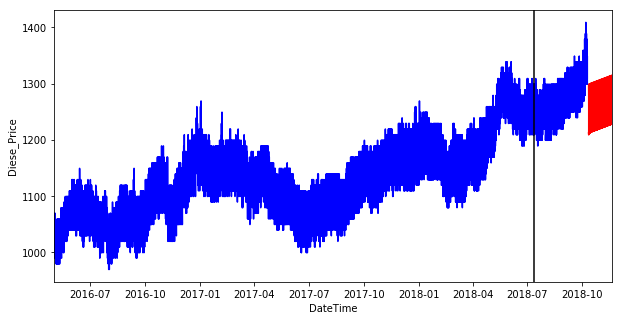

In [111]:
K=len(Step)
Step['forecast']=model_fit.forecast(K)
#forecast=forecast.astype(int)
#forecast=np.exp(forecast)
print(Step['forecast'])
#plot forecast results and display RMSE
plt.figure(figsize=(10,5))
plt.plot(df,'b');
plt.plot(Step['forecast'],'r');

#plt.title('RMSE:%.2f'% np.sqrt(sum((Step['diesel']-Step['forecast'])**2)/len(Step)));
plt.xlabel("DateTime");
plt.ylabel("Diese_Price");
plt.autoscale(enable=True,axis='x',tight=True)
plt.axvline(x=df.index[split_point],color='black');#line separates training/testing

In [77]:
pred_dynamic = model_fit.get_prediction(start =19195, end = 21327, dynamic=False)
print(pred_dynamic)
pred_dynamic_ci = pred_dynamic.conf_int(alpha=0.05)
print(pred_dynamic_ci)


[[1186.97969162 1238.1943915 ]
 [1186.45154088 1240.57972149]
 [1185.80483923 1241.79508427]
 ...
 [1065.1067555  1438.84086138]
 [1060.53410137 1434.29517652]
 [1060.27952477 1434.07396656]]


In [114]:
Step.head(100)

,diesel,forecast
2018-10-12 00:00:00,0,1211.675261
2018-10-12 01:00:00,0,1212.587042
2018-10-12 00:00:00,0,1213.515631
2018-10-12 01:00:00,0,1213.799962
2018-10-12 02:00:00,0,1208.582239
2018-10-12 03:00:00,0,1296.493570
2018-10-12 04:00:00,0,1295.877257
2018-10-12 05:00:00,0,1294.252982
2018-10-12 06:00:00,0,1247.283547
2018-10-12 07:00:00,0,1242.803336


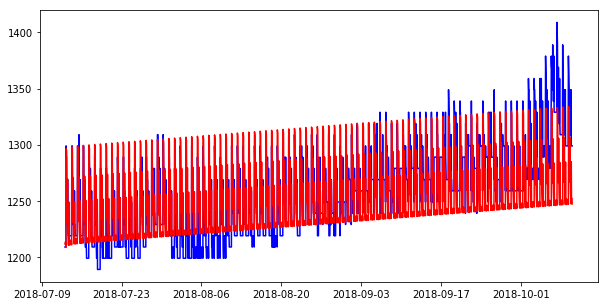

In [79]:
plt.figure(figsize=(10,5))
#plt.plot(pred_dynamic)
plt.plot(testing['diesel'],'b')
plt.plot(testing['forecast'],'r');

In [116]:
test=Step['2018-10-12':'2018-10-19']
test.head()

,diesel,forecast
2018-10-12 00:00:00,0,1211.675261
2018-10-12 01:00:00,0,1212.587042
2018-10-12 00:00:00,0,1213.515631
2018-10-12 01:00:00,0,1213.799962
2018-10-12 02:00:00,0,1208.582239


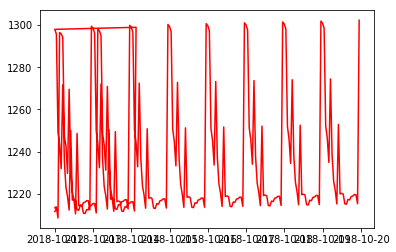

In [117]:

plt.plot(test['forecast'],'r');


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test['forecast'],'r');